# Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, our goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*



### Objectives 
The main goal of the case study is to build ML models to predict churn. The predictive model that we are going to build will serve the following purposes:

- It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

- It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why  customers choose to switch to other networks.

- Even though overall accuracy will be our primary evaluation metric, we should also mention other metrics like  recall for the different models that can be used for evaluation purposes based on different business objectives. 

 - Recommend strategies to manage customer churn based on our observations.

## Loading Data and preprocessing/ cleaning

In [280]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os




#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from scipy.stats import randint, uniform

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [281]:
# let us import train data onto dataframe df 
df = pd.read_csv('train.csv', index_col='id') # indexing the id column

In [282]:
df.shape # we have 69999 records and 171 features

(69999, 171)

In [283]:
df.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.

#### Dropping columns which are not required

In [284]:
df.shape

(69999, 171)

In [285]:
# let us check number of unique values of each column


In [287]:
pd.set_option('display.max_rows', None)   # This ensures all values are displayed
df.nunique()

circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
arpu_6                      61615
arpu_7                      61425
arpu_8                      60194
onnet_mou_6                 20057
onnet_mou_7                 20076
onnet_mou_8                 19725
offnet_mou_6                26254
offnet_mou_7                26139
offnet_mou_8                25995
roam_ic_mou_6                5306
roam_ic_mou_7                4240
roam_ic_mou_8                4252
roam_og_mou_6                6568
roam_og_mou_7                5305
roam_og_mou_8                5215
loc_og_t2t_mou_6            11491
loc_og_t2t_mou_7            11359
loc_og_t2t_mou_8            11296
loc_og_t2m_mou_6            17848
loc_og_t2m_mou_7            17641
loc_og_t2m_mou_8            17616
loc_og_t2f_mou_6             3376
loc_og_t2f_mou

In [288]:
# we can see some columns have only 1 unique value , we wont be needing such columns
# lets drop these

col = df.columns[df.nunique()==1]
df.drop(columns=col, inplace = True)

In [290]:
#columns which got removed
col

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [292]:
# checking shape
df.shape

(69999, 158)

In [293]:
# let us drop other 3 date columns ----> last recharge date of each month--> not necessary as too much unique values

col = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
df.drop(columns=col, inplace=True)

In [294]:
df.shape

(69999, 155)

In [295]:
# let us check info 

df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 69999 entries, 0 to 69998
Data columns (total 155 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    arpu_6                    float64
 1    arpu_7                    float64
 2    arpu_8                    float64
 3    onnet_mou_6               float64
 4    onnet_mou_7               float64
 5    onnet_mou_8               float64
 6    offnet_mou_6              float64
 7    offnet_mou_7              float64
 8    offnet_mou_8              float64
 9    roam_ic_mou_6             float64
 10   roam_ic_mou_7             float64
 11   roam_ic_mou_8             float64
 12   roam_og_mou_6             float64
 13   roam_og_mou_7             float64
 14   roam_og_mou_8             float64
 15   loc_og_t2t_mou_6          float64
 16   loc_og_t2t_mou_7          float64
 17   loc_og_t2t_mou_8          float64
 18   loc_og_t2m_mou_6          float64
 19   loc_og_t2m_mou_7          float64
 20   loc_og_t2

In [296]:
# all data types looking good

In [297]:
# let us now summarize the features
df.describe(include='all')

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568,17865,18417,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,184

In [298]:
# let us drop columns which have more than 40% null values

df.isna().mean()*100

arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_mou_6             3.954342
loc_og_t2m_mou_7             3.838626
loc_og_t2m_mou_8             5.290076
loc_og_t2f_mou_6             3.954342
loc_og_t2f_mou_7             3.838626
loc_og_t2f_mou_8             5.290076
loc_og_t2c_mou_6             3.954342
loc_og_t2c_mou_7             3.838626
loc_og_t2c_m

In [299]:
# as we can see many columns have more than 40% null values . let us drop these

n = df.isna().mean()*100
c = n[n>=40].index.to_list()
df.drop(columns=c , inplace=True)

In [300]:
# now lets use descibe again
df.describe(include="all")

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,7.014568,7.004892,14.186457,9.842191,9.771783,46.904854,46.166503,45.686109,93.238231,90.799240,91.121447,3.743179,3.777031,3.661652,1.126025,1.361052,1.420840,143.893585,140.750120,140.476486,80.619382,83.775851,83.471486,88.152110,91.538615,90.586999,1.126377,1.084062,1.057739,169.900601,176.401217,175.118852,0.845763,0.811100,0.841648,3.958619,4.976783,5.045027,0.462581,0.024425,0.033059,306.451436,310.572674,304.513065,48.043255,47.882736,47.256388,1

In [301]:
df.shape

(69999, 125)

In [302]:
# let us check null values again
df.isna().mean()*100

arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
onnet_mou_6           3.954342
onnet_mou_7           3.838626
onnet_mou_8           5.290076
offnet_mou_6          3.954342
offnet_mou_7          3.838626
offnet_mou_8          5.290076
roam_ic_mou_6         3.954342
roam_ic_mou_7         3.838626
roam_ic_mou_8         5.290076
roam_og_mou_6         3.954342
roam_og_mou_7         3.838626
roam_og_mou_8         5.290076
loc_og_t2t_mou_6      3.954342
loc_og_t2t_mou_7      3.838626
loc_og_t2t_mou_8      5.290076
loc_og_t2m_mou_6      3.954342
loc_og_t2m_mou_7      3.838626
loc_og_t2m_mou_8      5.290076
loc_og_t2f_mou_6      3.954342
loc_og_t2f_mou_7      3.838626
loc_og_t2f_mou_8      5.290076
loc_og_t2c_mou_6      3.954342
loc_og_t2c_mou_7      3.838626
loc_og_t2c_mou_8      5.290076
loc_og_mou_6          3.954342
loc_og_mou_7          3.838626
loc_og_mou_8          5.290076
std_og_t2t_mou_6      3.954342
std_og_t2t_mou_7      3.838626
std_og_t

In [303]:
# we can see there are columns which have around 3-5% missing values
# we will not remove these rows but instead will impute the missing values with 0 


# but before that let us check if target column has null value or not 
df['churn_probability'].unique()

array([0, 1], dtype=int64)

In [306]:
# no null in churn column so we can safely impute without affecting churn column
# let us store these columns first
n = df.isna().mean()*100
impute_col = n[n>0].index.to_list()

In [ ]:
#let us impute for these columns
imp = SimpleImputer(strategy='constant', fill_value=0)
df[impute_col] = imp.fit_transform(df[impute_col])

In [308]:
df.isna().mean()

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_m

In [309]:
# we have done all the cleaning and preprocessing 
# df is now clean of missing values and unnecessary columns

## Train Test Split

In [310]:
X = df.iloc[:,:-1] #assigning all collumns to X except target

y = df.iloc[:,-1]  #assigning churn probability column to y

In [311]:
# checking shape of X
X.shape


(69999, 124)

In [312]:
# checking shape of y
y.shape

(69999,)

In [313]:
# using train_test_split to split our data into train and test set
# test set is for our own testing and different from competition test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.7, random_state=42) # 70-30 split

In [314]:
X_train.shape

(20999, 124)

In [315]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16783,166.763,86.419,121.680,25.31,27.19,52.89,122.91,97.28,69.86,0.0,0.0,0.0,0.0,0.0,0.0,25.31,27.19,52.89,117.31,97.28,69.86,0.0,0.0,0.0,1.13,0.00,0.00,142.63,124.48,122.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,5.59,0.00,0.00,0.0,0.0,0.0,148.23,124.48,122.76,20.04,4.61,11.68,48.61,77.49,105.84,0.86,0.00,0.00,69.53,82.11,117.53,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,69.53,82.11,117.53,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,10,7,10,191,70,143,48,20,33,30,10,10,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,185,0.0,0.0,0.0
27240,134.801,59.000,32.300,27.46,11.78,1.76,90.51,77.86,29.76,0.0,0.0,0.0,0.0,0.0,0.0,27.46,11.78,1.76,42.99,32.38,14.13,0.0,0.0,0.0,0.00,0.00,0.00,70.46,44.16,15.89,0.00,0.00,0.00,47.16,45.26,15.63,0.00,0.0,0.00,47.16,45.26,15.63,0.0,0.0,0.0,0.35,0.21,0.00,0.0,0.0,0.0,117.98,89.64,31.53,10.49,29.11,17.46,75.53,40.09,48.26,4.96,71.24,2.96,90.99,140.46,68.69,1.48,0.40,0.0,10.31,10.11,1.50,1.33,6.99,24.88,13.13,17.51,26.38,106.18,157.98,100.69,0.00,0.00,0.00,0.0,0.00,0.0,2.04,0.0,5.61,3,2,2,177,0,0,110,0,0,0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,930,0.0,0.0,0.0
50926,171.859,91.109,54.955,2.73,6.61,41.99,189.13,65.84,6.59,0.0,0.0,0.0,0.0,0.0,0.0,1.59,0.00,4.53,103.63,17.49,0.36,0.0,0.0,0.0,26.54,6.11,4.85,105.23,17.49,4.89,1.13,6.61,37.46,58.94,42.23,1.38,0.00,0.0,0.00,60.08,48.84,38.84,0.0,0.0,0.0,26.54,6.11,5.28,0.0,0.0,0.0,191.86,72.46,49.03,55.18,13.19,0.76,446.58,72.63,46.68,0.00,0.00,0.00,501.76,85.83,47.44,181.89,0.16,0.0,17.86,8.94,2.16,0.00,0.00,0.00,199.76,9.11,2.16,733.04,96.43,49.68,0.00,0.00,0.06,0.0,1.48,0.0,31.51,0.0,0.00,6,3,6,210,80,60,50,30,20,30,20,0,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,336,0.0,0.0,0.0
30290,66.209,43.888,98.971,14.64,8.84,8.94,22.79,0.96,23.29,0.0,0.0,0.0,0.0,0.0,0.0,14.64,8.84,8.94,22.79,0.96,23.29,0.0,0.0,0.0,0.00,0.00,0.00,37.44,9.81,32.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,37.44,9.81,32.24,10.06,4.08,12.24,21.13,17.58,23.23,1.20,0.00,0.00,32.39,21.66,35.

## Exploratory Data Analysis

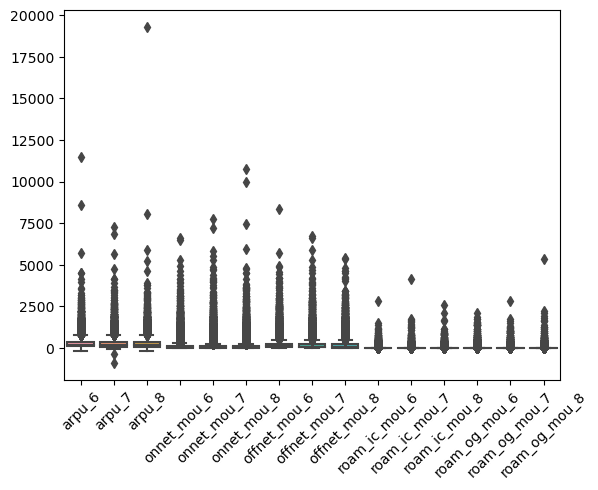

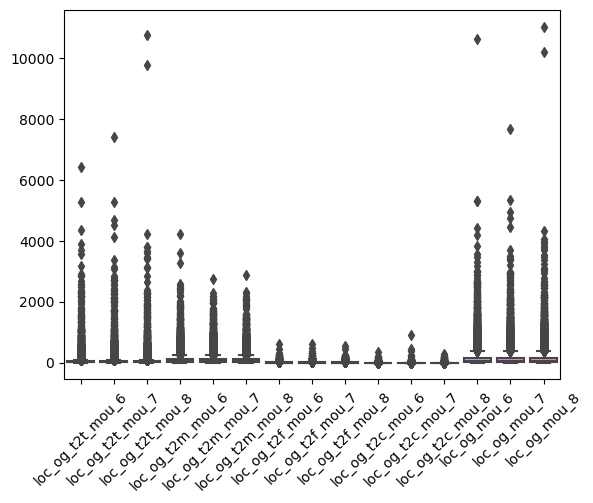

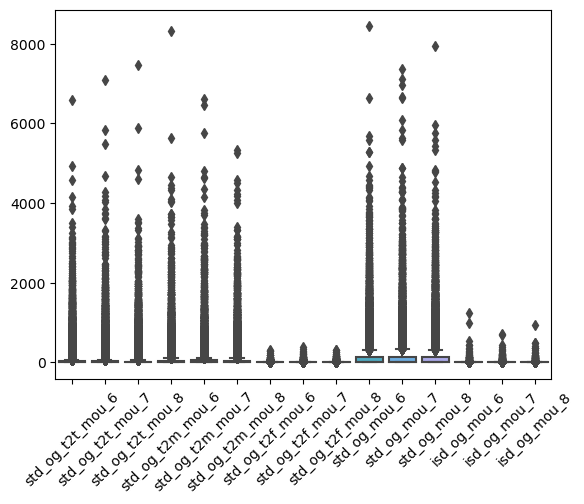

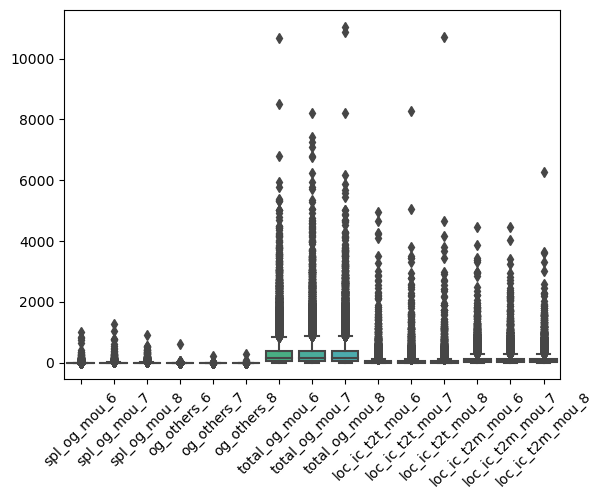

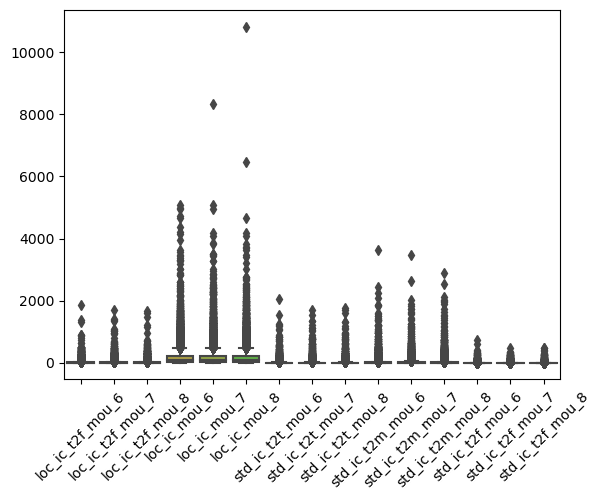

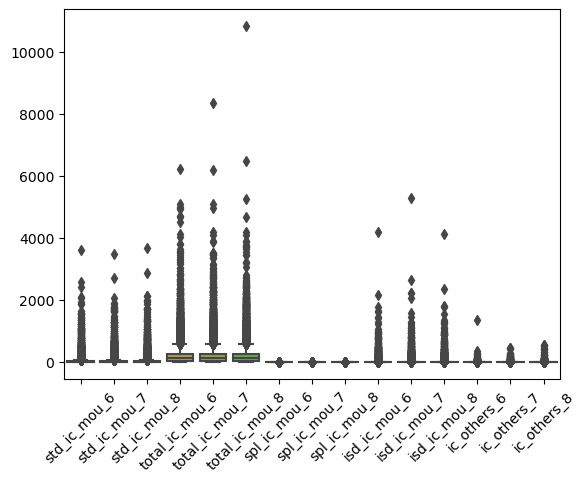

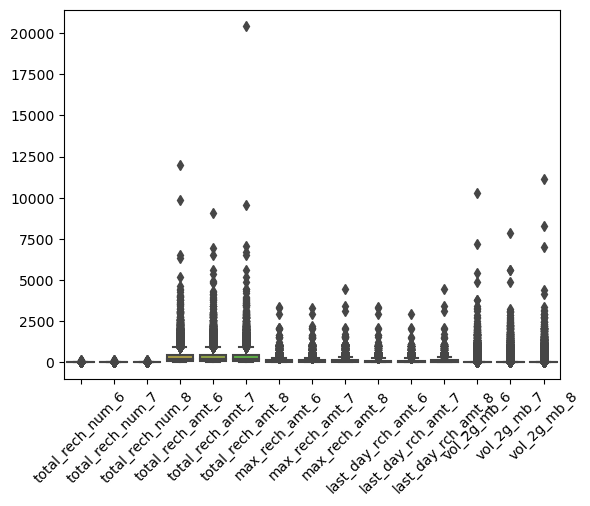

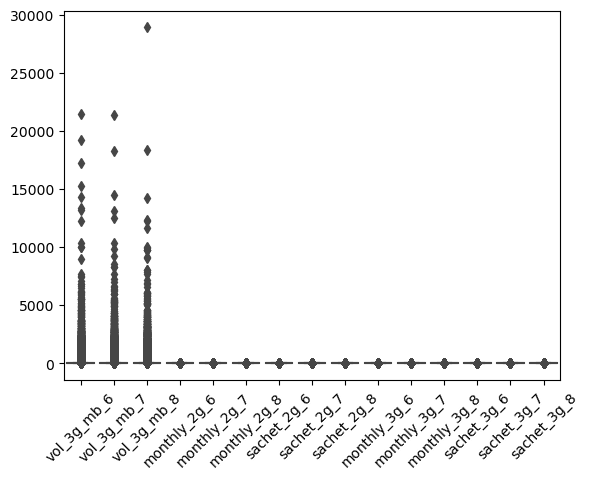

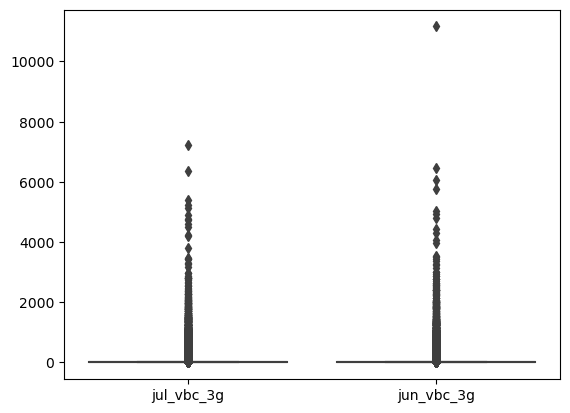

In [316]:
# let us plot BOX_plot taking 10 features at a time

#15 at a time till 120
for i in range (0,120,15):
    a = X_train.columns[i:i+15]
    sns.boxplot(X_train[a])
    plt.xticks(rotation = 45)
    plt.show()

#remaing 2 
b= X_train.columns[-2:]
sns.boxplot(X_train[b])
plt.show()

In [317]:
# we can see most columns except aon have many outliers
# let us cap these outliers

#using k-sigma to cap
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [318]:
X_train = X_train.apply(cap_outliers, axis=0)

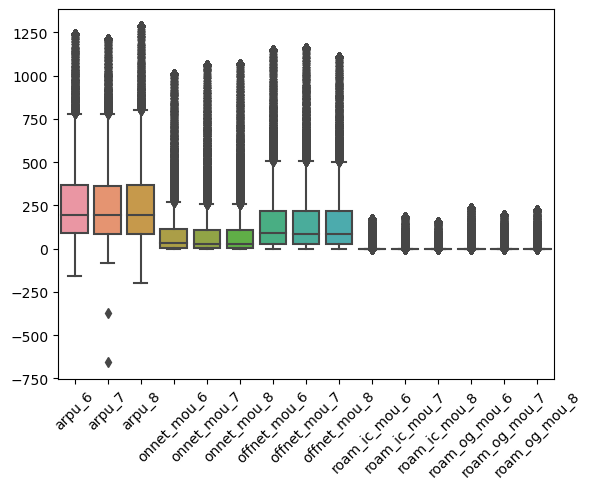

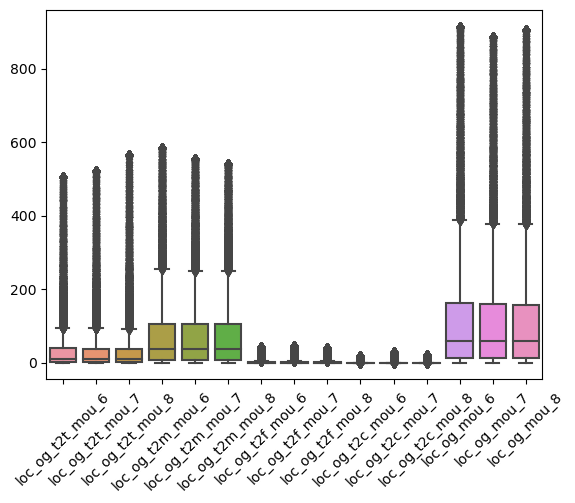

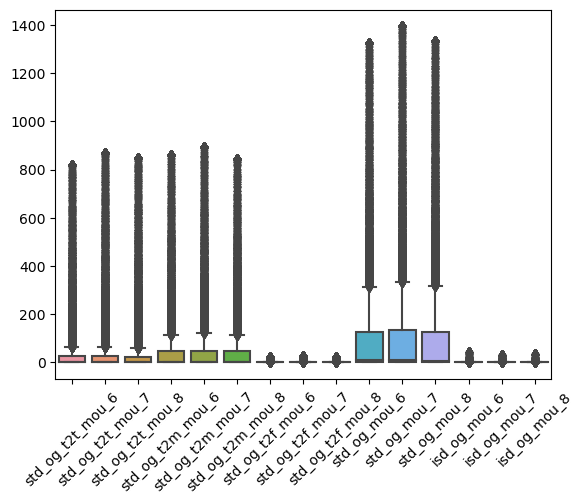

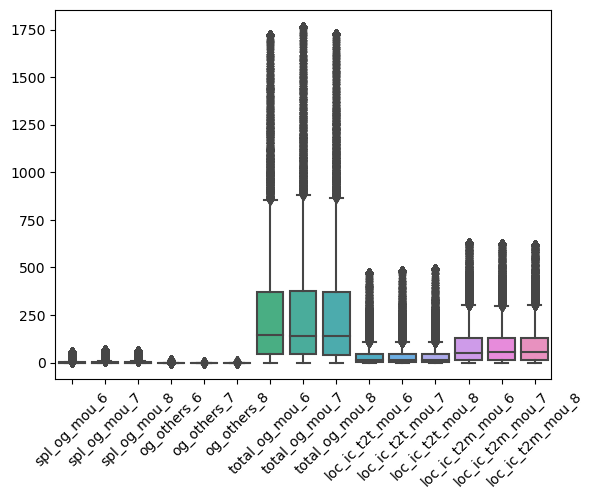

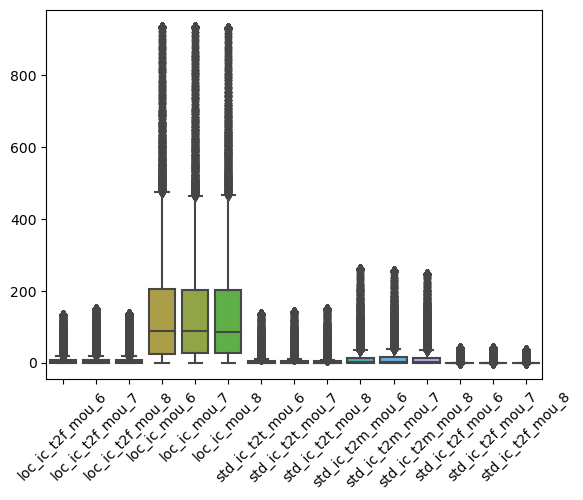

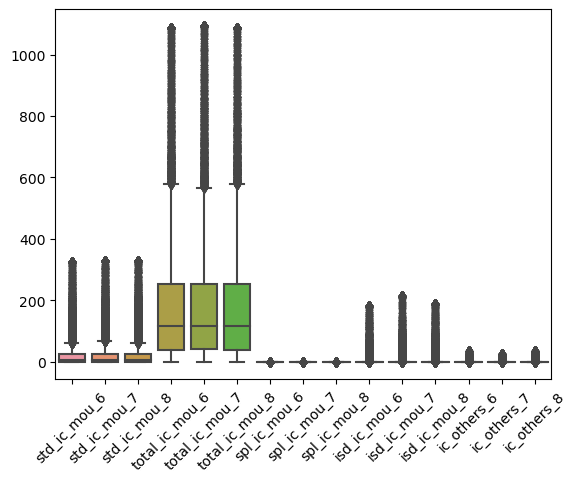

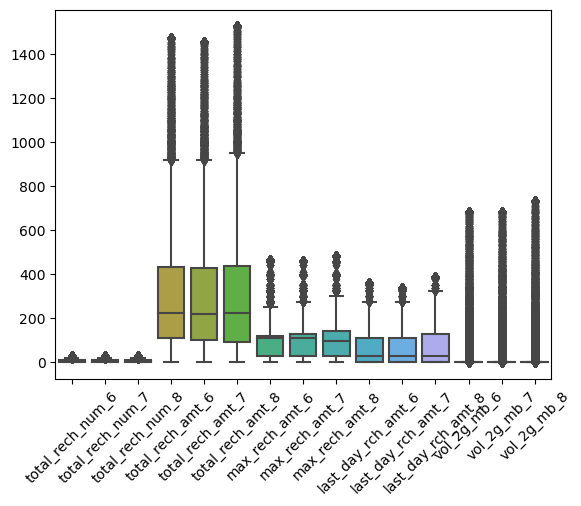

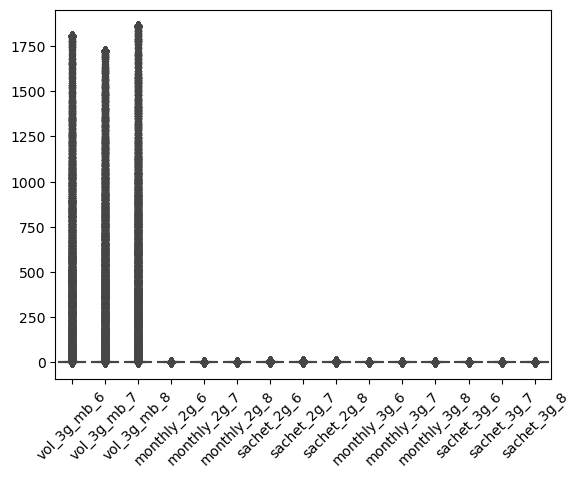

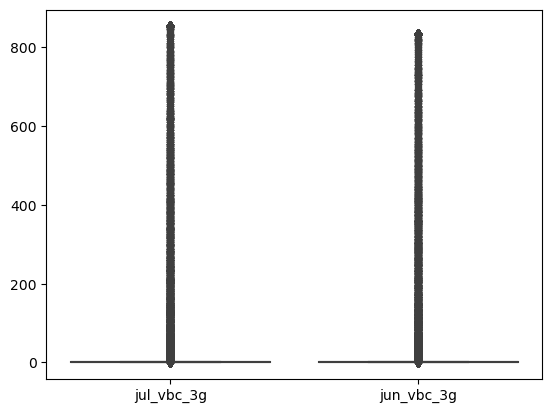

In [320]:
# let us plot BOX_plot taking 10 features at a time

#15 at a time till 120
for i in range (0,120,15):
    a = X_train.columns[i:i+15]
    sns.boxplot(X_train[a])
    plt.xticks(rotation = 45)
    plt.show()

#remaing 2 
b= X_train.columns[-2:]
sns.boxplot(X_train[b])
plt.show()

In [321]:
# now many columns are there where most values are 0 and some values are high such as VBC,sachet etc.
#now these are actually not outliers
#for the box plots to be all in same range let us do feature scaling

## Feature Scaling

In [322]:
# let us use Standard Scaler 

scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

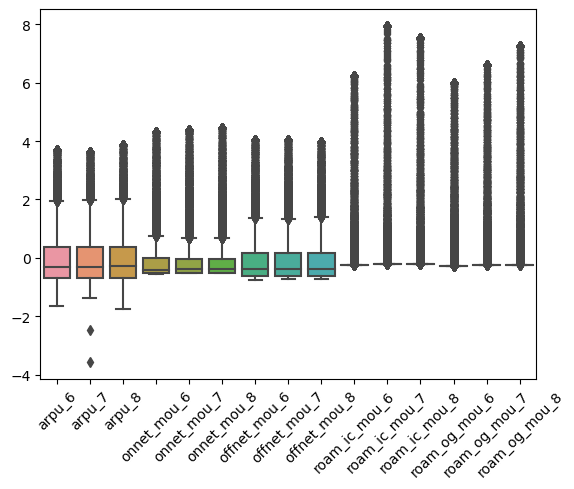

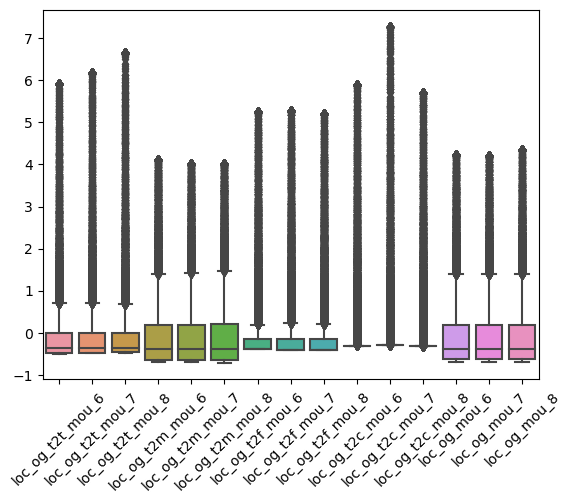

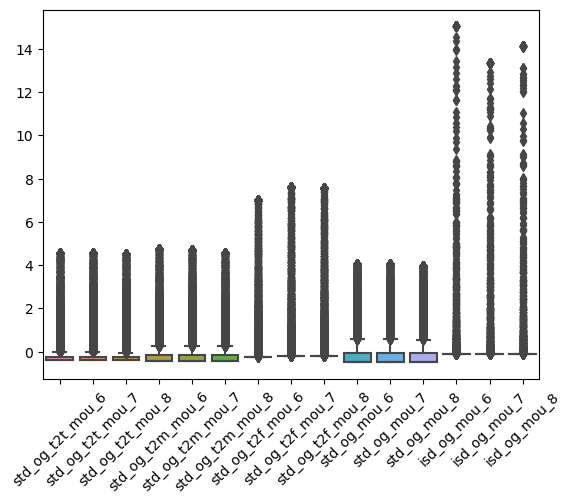

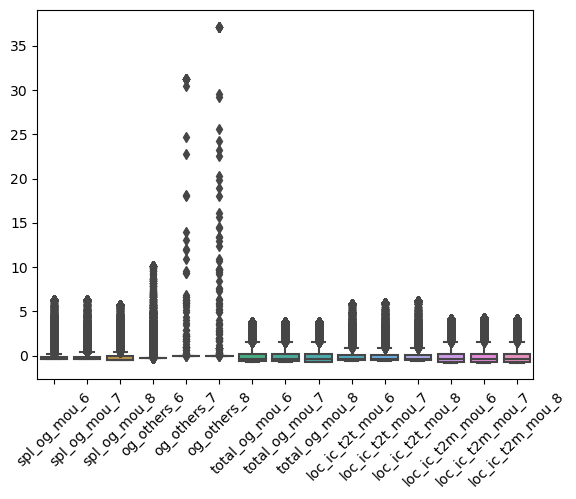

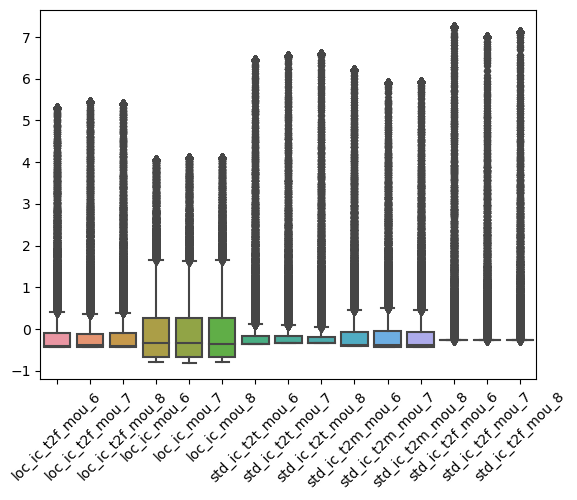

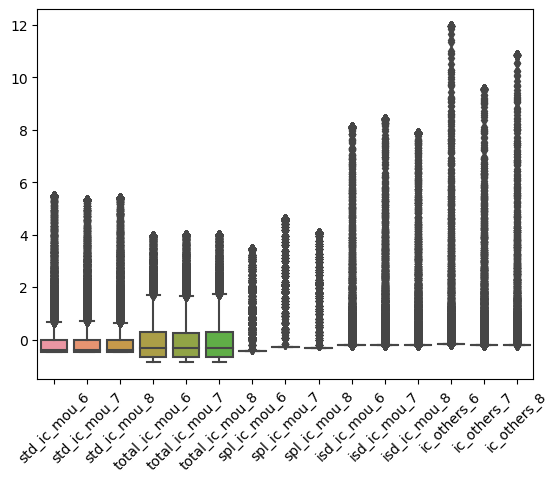

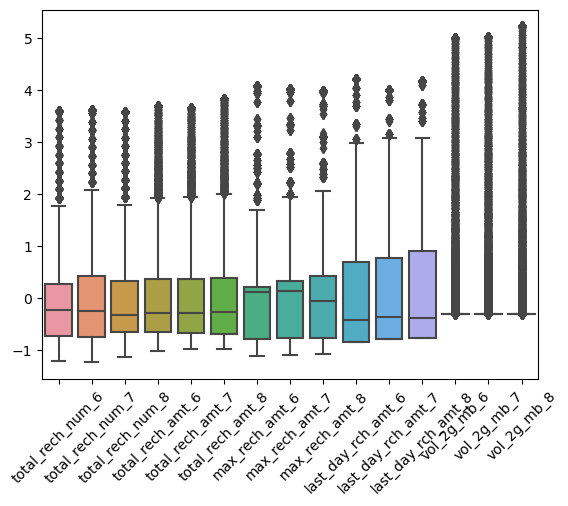

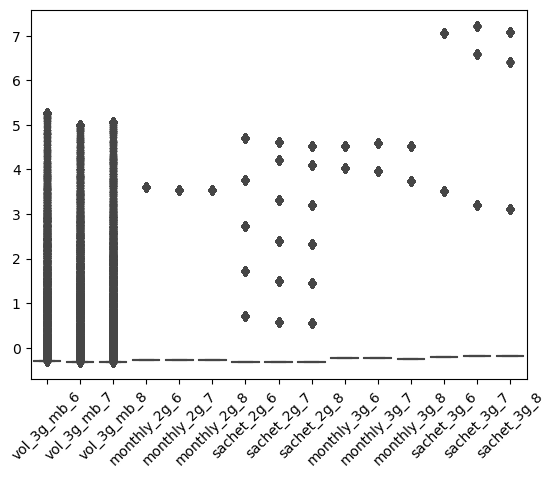

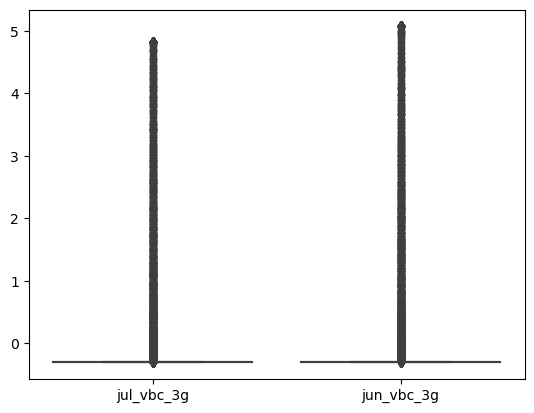

In [323]:
# let us plot BOX_plot taking 10 features at a time

#15 at a time till 120
for i in range (0,120,15):
    a = X_train.columns[i:i+15]
    sns.boxplot(X_train_scaled[a])
    plt.xticks(rotation = 45)
    plt.show()

#remaing 2 
b= X_train.columns[-2:]
sns.boxplot(X_train_scaled[b])
plt.show()

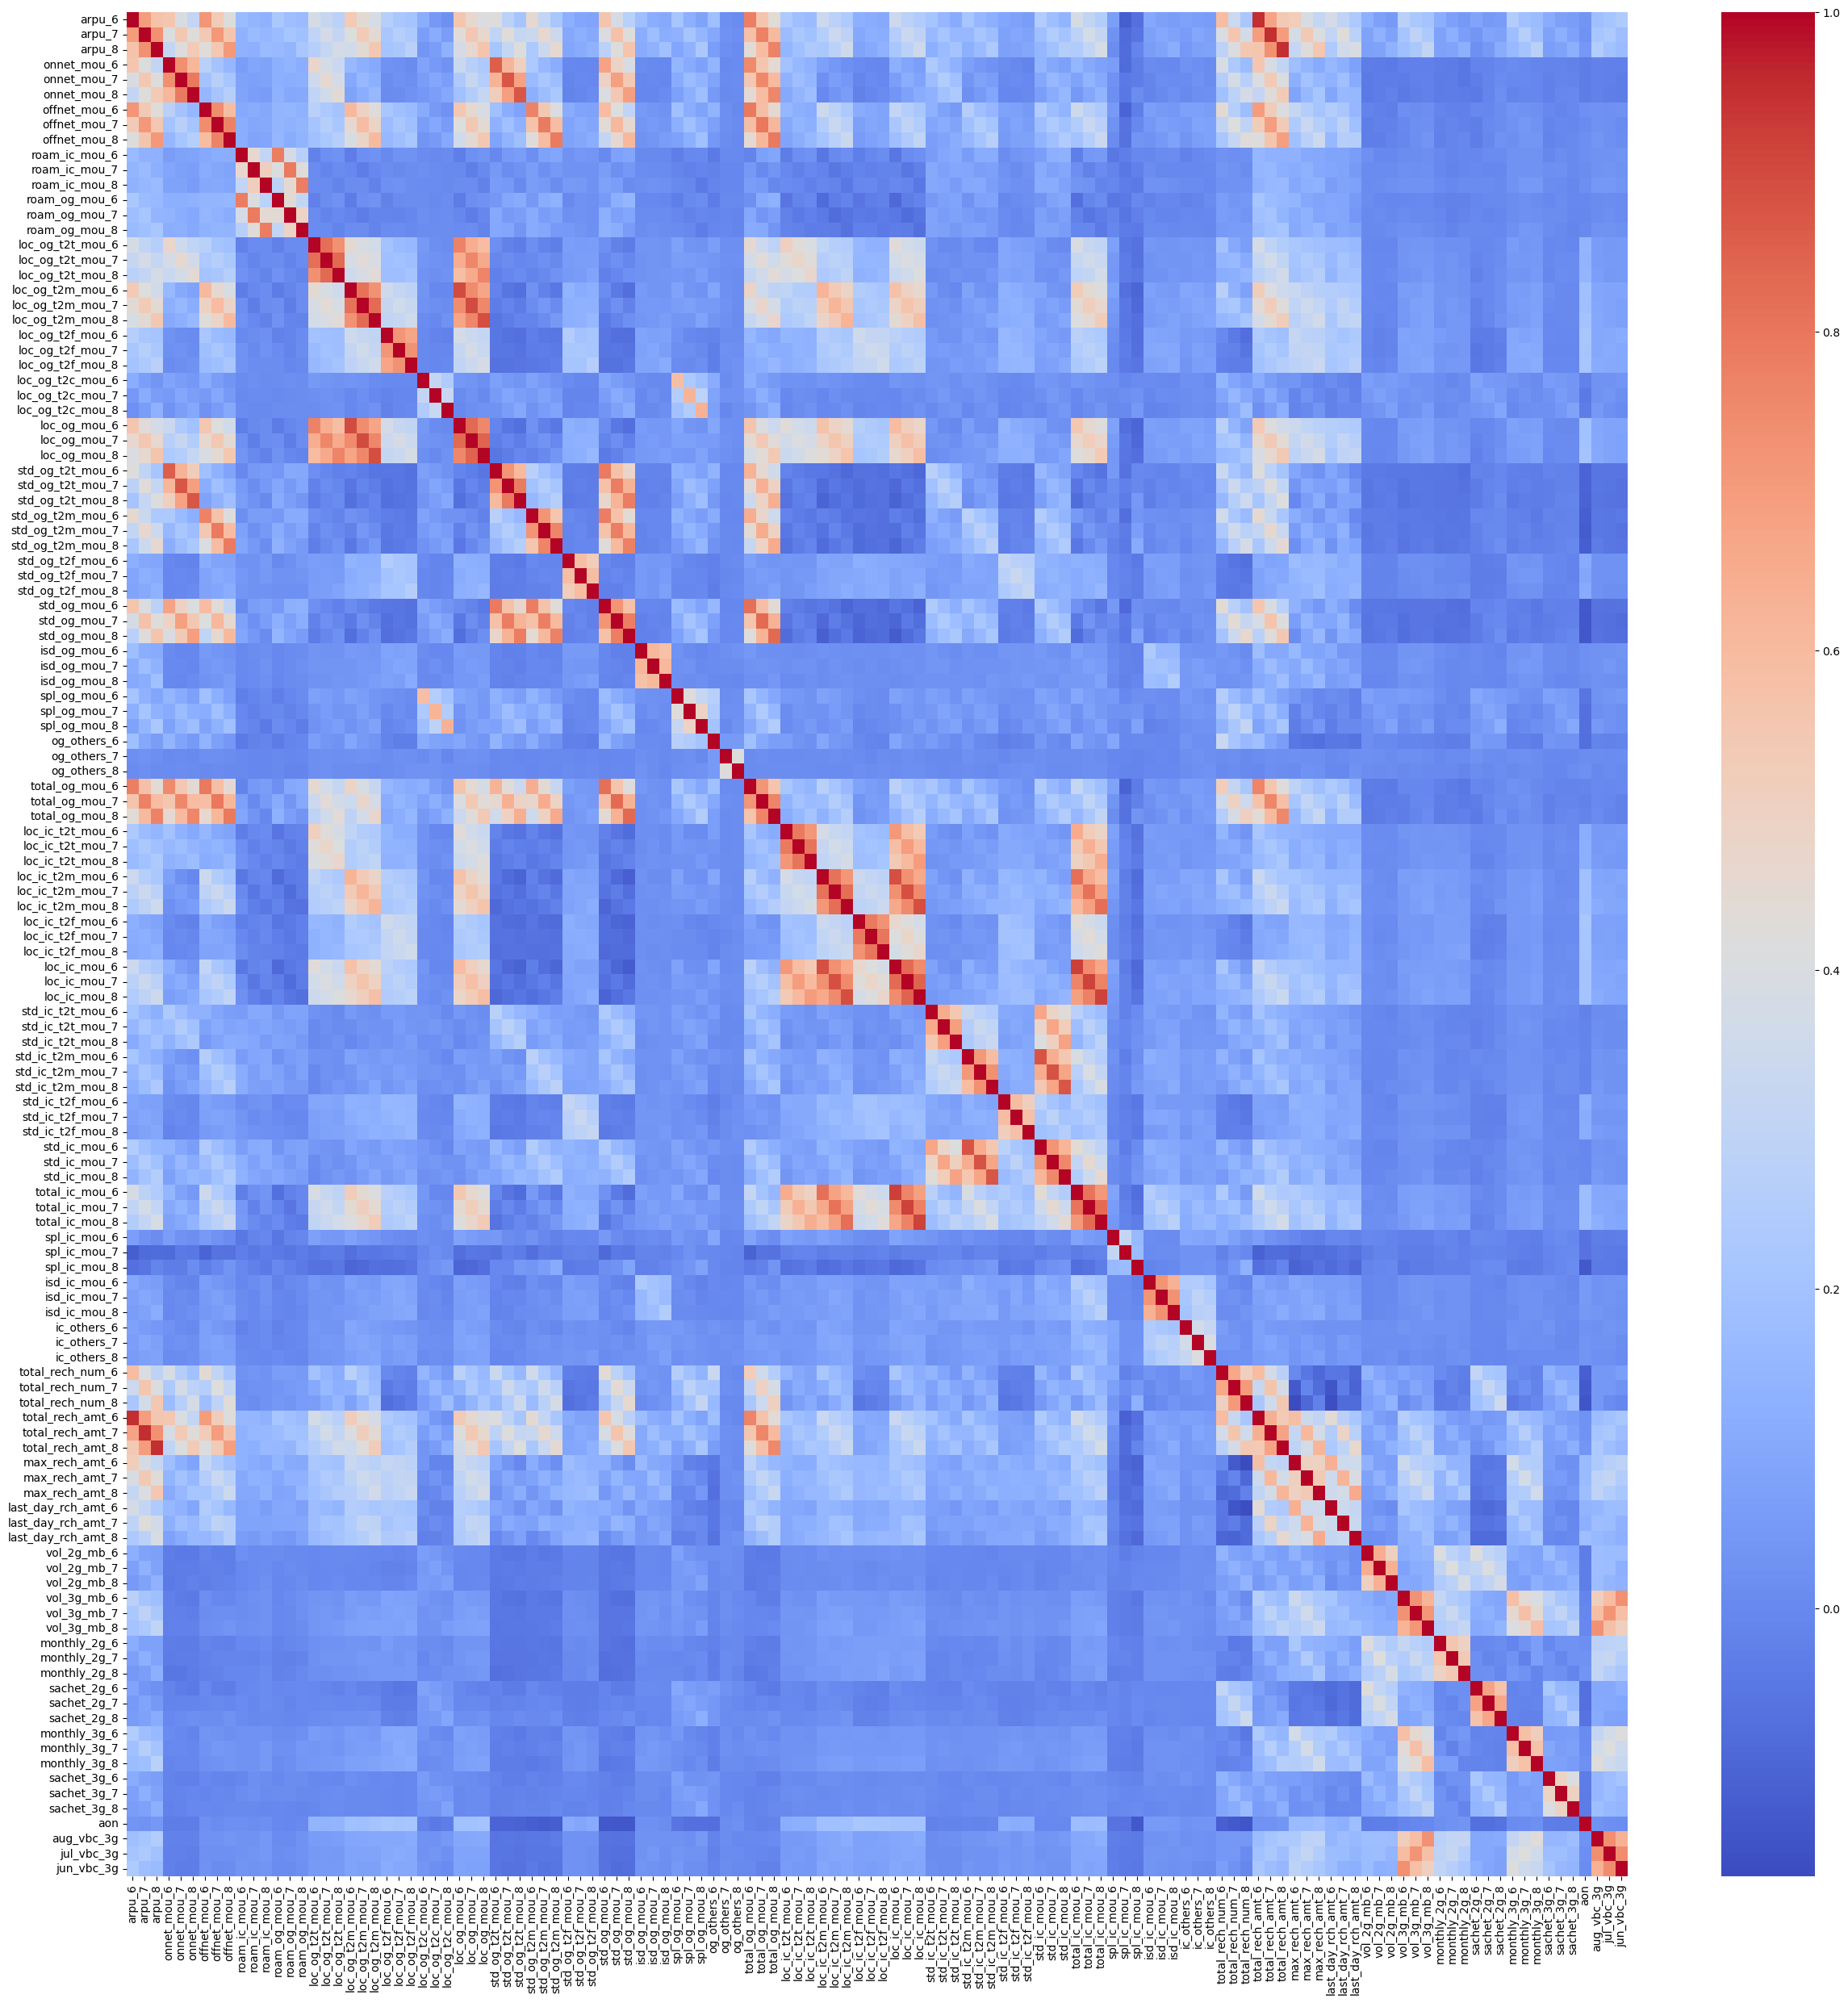

In [324]:
# let us plot correlation matrix to check correlation between predictors
plt.figure(figsize=(30, 30))
sns.heatmap(X_train_scaled.corr(),  cmap='coolwarm')
plt.show()

We can see some features have high corr among themselves.
Most prominent are the following:
- **average-revenue-per-user columns and onnet,offnet columns** : which makes sense since more number of calls(onnet+offnet) generates more revenue from a user
- **average-revenue-per-user columns**:  which makes sense since more recharge from a user will generate more revenue
- **average-revenue-per-user columns and Outgoing calls minutes of usage** - Since more minutes on outgoing call will generate more revenue from a user
- **outgoing columns and std_outgoing columns** : This can be due to more outgoing calls being STD calls 



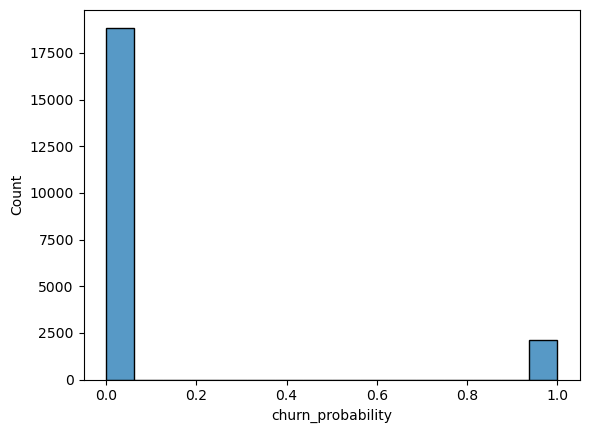

In [326]:
# let us check distribution of y_train 
sns.histplot(y_train)
plt.show()

# Feature engineering and selection

For finding out the most significant features contributing to the overall prediction we will be using :
- Random forest feature importance

In [328]:
#instantiate
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1) #number of trees as 100
#fit
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_jobs=-1)

In [329]:
#storing the columns of X_trained_scaled in col
col = X_train_scaled.columns

In [330]:
#making a dataframe to view feature importance of each column 
feature_importances = pd.DataFrame({'col':col, 'importance':rf.feature_importances_})

In [331]:
feature_importances

,col,importance
0,arpu_6,0.009875
1,arpu_7,0.010118
2,arpu_8,0.035991
3,onnet_mou_6,0.006974
4,onnet_mou_7,0.007074
5,onnet_mou_8,0.011100
6,offnet_mou_6,0.007731
7,offnet_mou_7,0.009519
8,offnet_mou_8,0.016895
9,roam_ic_mou_6,0.003910


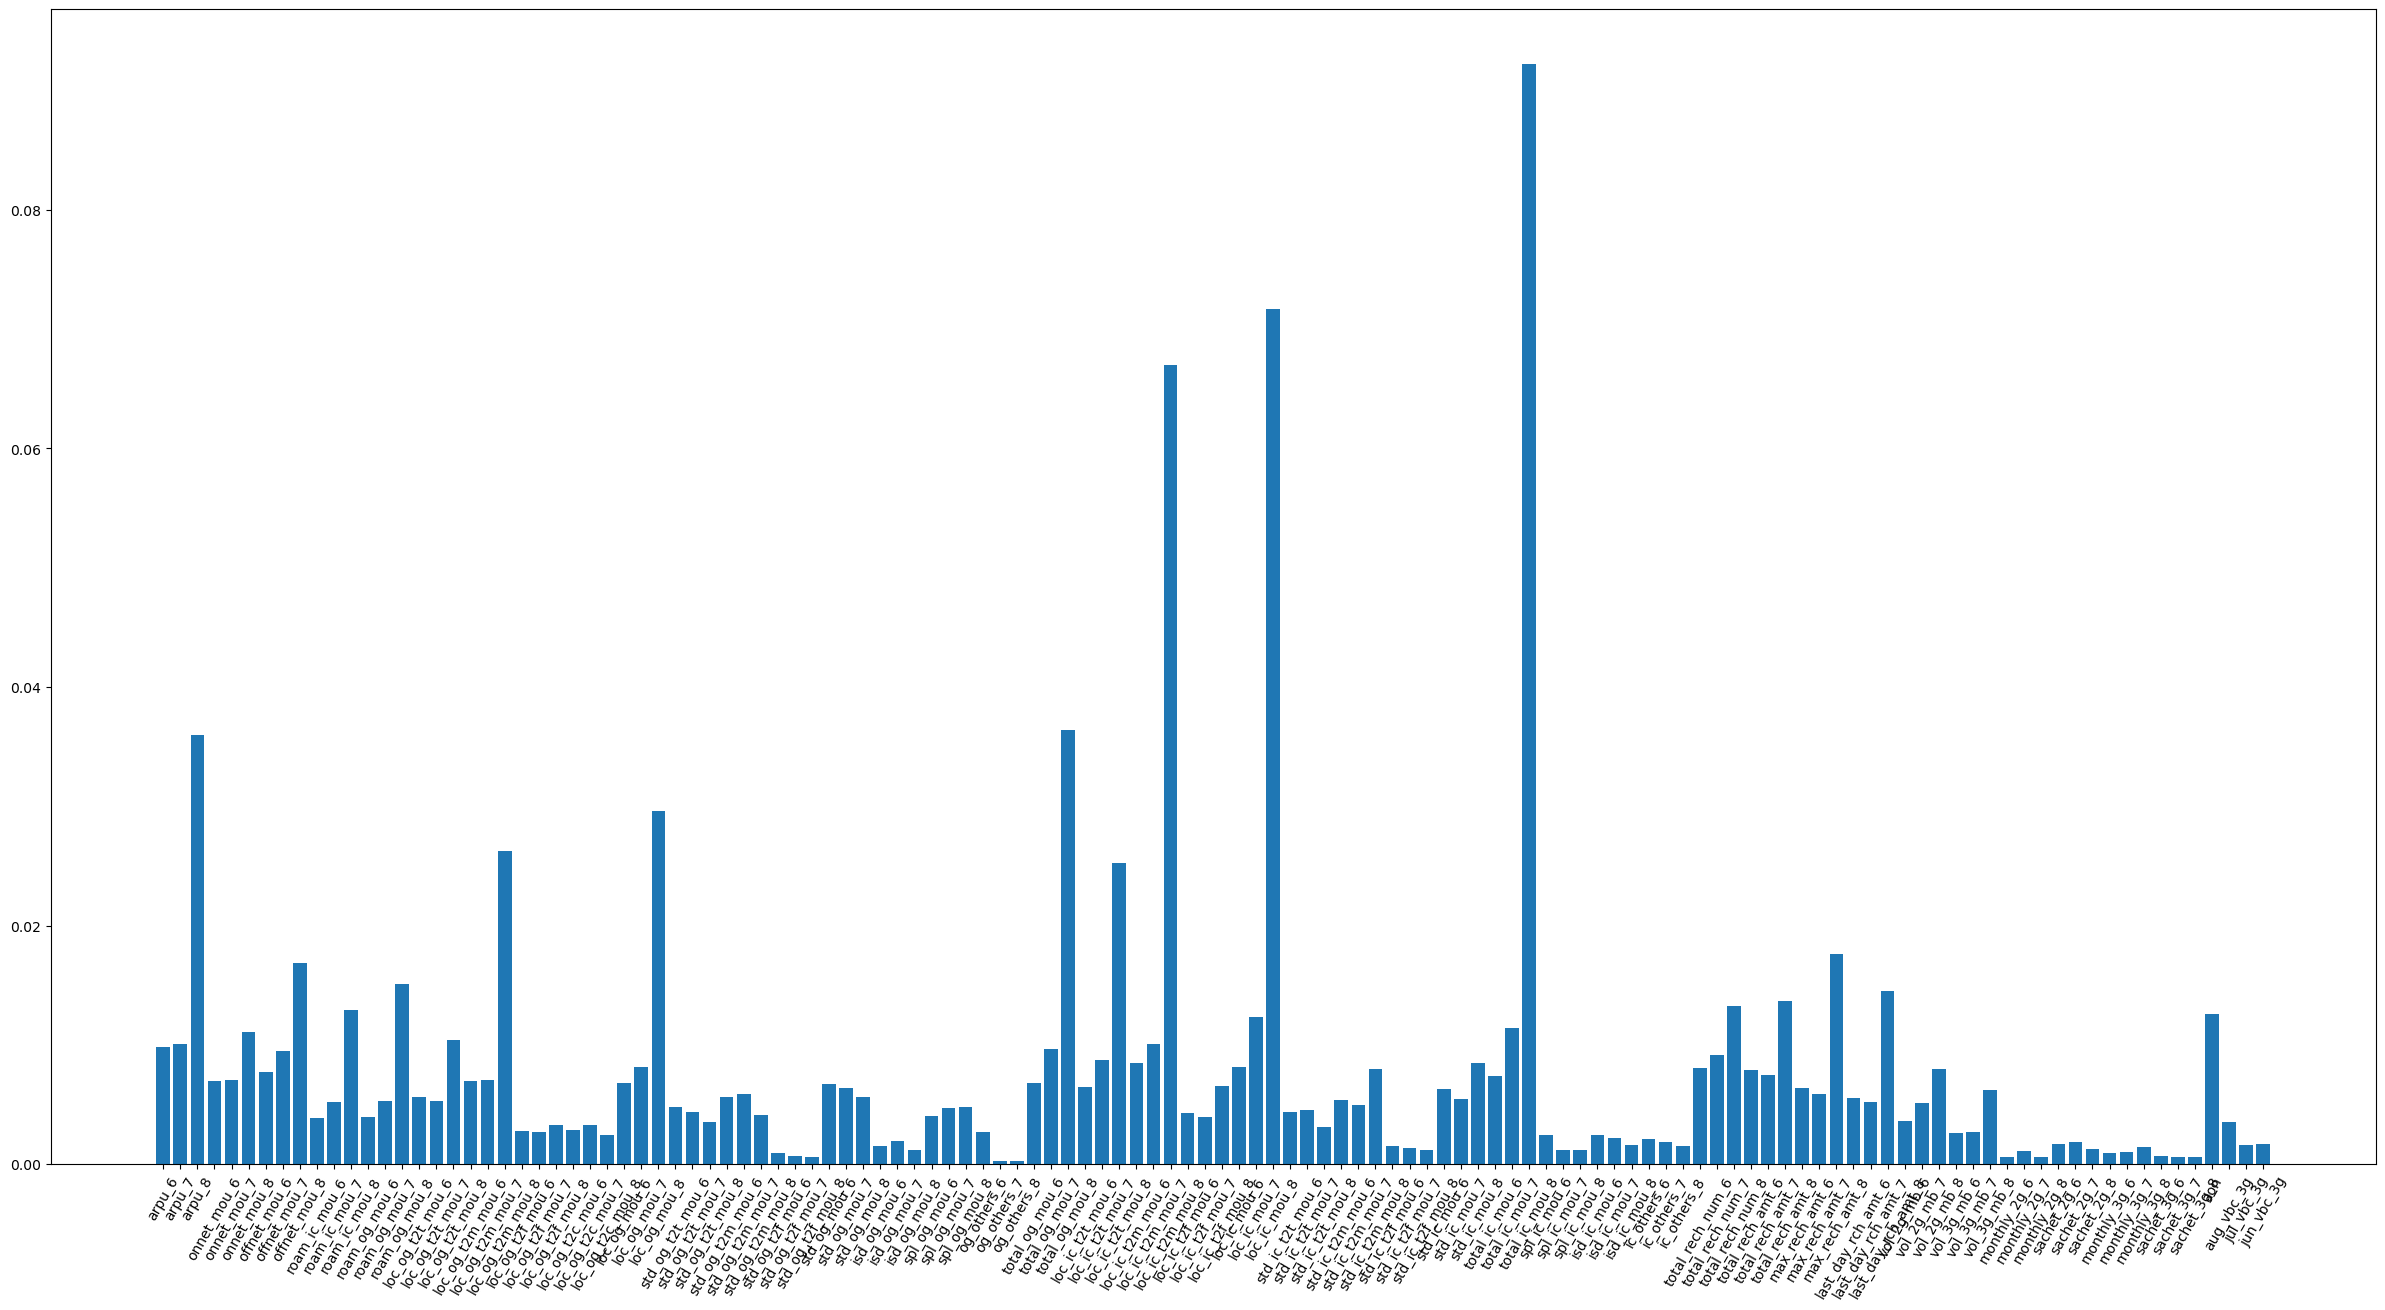

In [332]:
# lets plot these feature importance for better interpretation
plt.figure(figsize=(30,15))
plt.xticks(rotation=60)
plt.bar(feature_importances['col'], feature_importances['importance'])
plt.show()

In [40]:
# we can see that after using randomForest some features came out to be important than others 

In [359]:
# let us list down those features which contributes more than 1.5% to the overall model prediction

important_features = feature_importances[feature_importances.importance >= 0.015]

In [360]:
important_features.shape

(11, 2)

In [361]:
important_features

,col,importance
2,arpu_8,0.035991
8,offnet_mou_8,0.016895
14,roam_og_mou_8,0.015148
20,loc_og_t2m_mou_8,0.026295
29,loc_og_mou_8,0.029646
53,total_og_mou_8,0.036431
56,loc_ic_t2t_mou_8,0.025251
59,loc_ic_t2m_mou_8,0.067018
65,loc_ic_mou_8,0.071703
80,total_ic_mou_8,0.092187


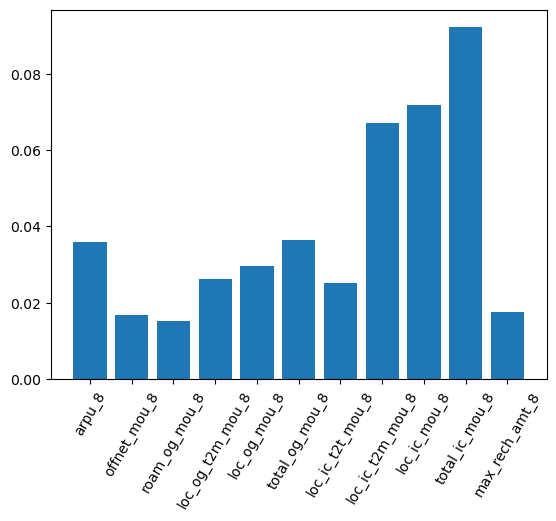

In [362]:
# so we can see the above 8 features are important towards the final prediction 
# lets visualize it 

plt.bar(important_features['col'],important_features['importance'])
plt.xticks(rotation=60)
plt.show()

In [363]:
# lets check and understand the corr of these features with our target variable 

y_train.shape

(20999,)

In [364]:
# lets make another X_train only consisting of important features
X_train_imp = X_train_scaled[important_features['col']]

In [365]:
X_train_imp.head(3)
#looks fine

,arpu_8,offnet_mou_8,roam_og_mou_8,loc_og_t2m_mou_8,loc_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_8,total_ic_mou_8,max_rech_amt_8
0,-0.556779,-0.435983,-0.234158,-0.096297,-0.013394,-0.431998,-0.389219,0.059902,-0.183956,-0.324330,-0.736347
1,-0.894693,-0.605957,-0.234158,-0.582601,-0.608767,-0.671420,-0.310248,-0.395311,-0.441169,-0.399235,-1.082095
2,-0.809043,-0.704169,-0.234158,-0.702759,-0.670048,-0.625493,-0.538417,-0.407802,-0.553080,-0.626127,-0.872551


In [366]:
# now lets find corr of y_train and X_train_imp features

# we have to create a df of X_train_imp and y_train
df = pd.DataFrame(X_train_imp)

In [367]:
#reseting index of y so as to merge 
y_train.reset_index(drop=True, inplace=True)

In [368]:
df.reset_index(drop=True, inplace=True)

In [369]:
# assigning y_train to a new column Churn Probability
df['Churn_probability'] = y_train

In [370]:
df.head(10)

,arpu_8,offnet_mou_8,roam_og_mou_8,loc_og_t2m_mou_8,loc_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_8,total_ic_mou_8,max_rech_amt_8,Churn_probability
0,-0.556779,-0.435983,-0.234158,-0.096297,-0.013394,-0.431998,-0.389219,0.059902,-0.183956,-0.324330,-0.736347,0
1,-0.894693,-0.605957,-0.234158,-0.582601,-0.608767,-0.671420,-0.310248,-0.395311,-0.441169,-0.399235,-1.082095,0
2,-0.809043,-0.704169,-0.234158,-0.702759,-0.670048,-0.625493,-0.538417,-0.407802,-0.553080,-0.626127,-0.872551,0
3,-0.642634,-0.633382,-0.234158,-0.502670,-0.517681,-0.669556,-0.381568,-0.593191,-0.616067,-0.689289,-0.820165,0
4,-0.424471,-0.507279,-0.234158,-0.258427,-0.107433,-0.471679,1.020235,0.327669,0.592104,0.383168,0.279942,0
5,2.661446,1.359262,-0.234158,-0.326840,-0.420189,3.771272,-0.548801,-0.307320,-0.490146,-0.296842,0.279942,0
6,-0.665098,-0.656483,-0.234158,-0.550227,-0.575118,-0.696614,-0.411079,-0.034572,-0.255316,-0.363695,-0.558235,0
7,0.005937,-0.656483,-0.234158,-0.550227,-0.545815,0.119304,-0.507402,-0.609161,-0.675261,-0.664913,-0.558235,0
8,3.151698,-0.448826,-0.234158,-0.614625,-0.587876,3.771272,-0.393864,-0.381080,-0.363752,-0.345191,1.945819,1
9,-0.175901,0.007307,-0.234158,0.665751,0.214348,-0.278918,-0.099431,0.160700,0.092847,-0.032542,-0.558235,0


In [371]:
# finding correlation matrix and storing it in corr
corr = df.corr()


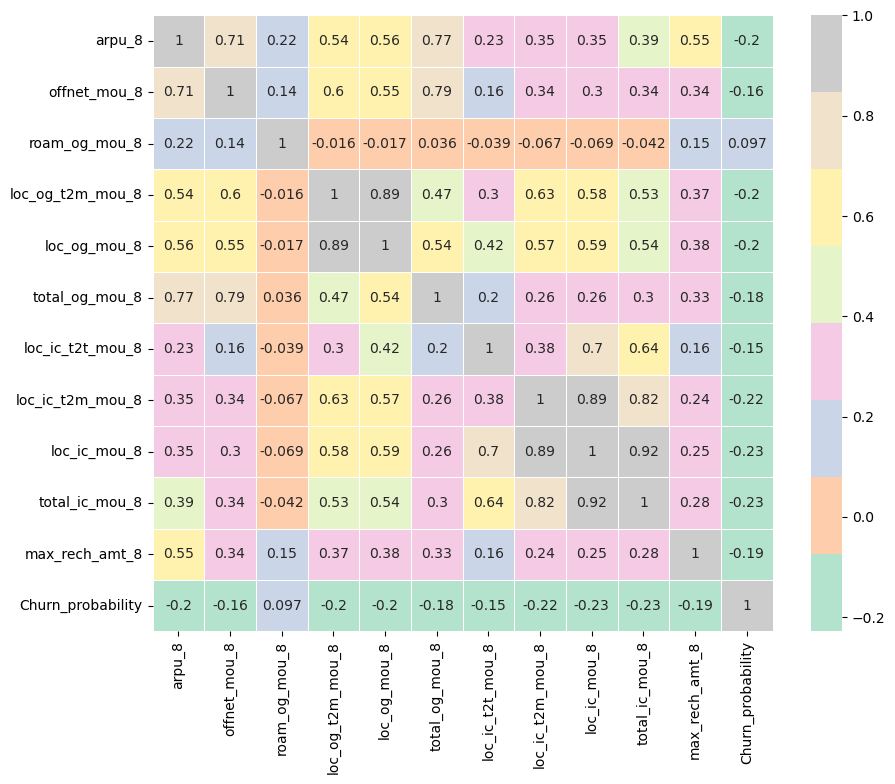

In [376]:
#using heatmap and corr to show correlation between the predictors and target variable
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='Pastel2',annot=True,linewidths=0.5,linecolor='white') 
plt.show()

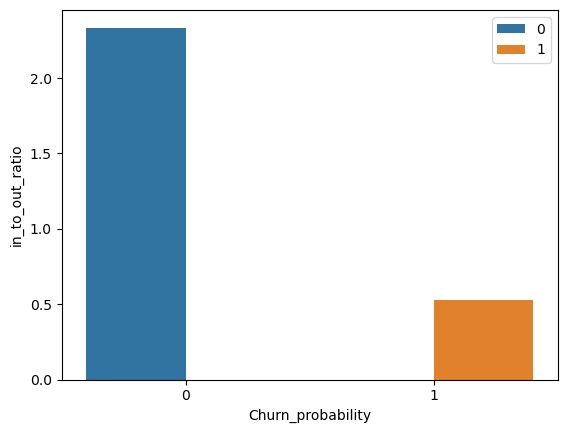

In [495]:
# we can also make a new column and understand how churn vs non churn customers behave

df2 = df # copying df into df2

df2['in_to_out_ratio'] = df2['total_ic_mou_8']/df2['total_og_mou_8']

sns.barplot(data=df2, x='Churn_probability', y='in_to_out_ratio' ,errorbar=None,hue='Churn_probability')
plt.legend()

plt.show()


We can see from the above plot that incoming call to outgoing call ratio is less for churn customers
- Reasons:
1. Customers who are planning to churn may reduce their use of the network, leading to fewer incoming calls. This could be because they are less engaged with the service and may not inform their contacts about their plan to switch, resulting in fewer incoming calls.
2. They may already be using another operator (in case they have a dual SIM or are transitioning to another service) for their communications, so fewer people are calling them on the current network.
3. A lower ratio of incoming to outgoing calls could also suggest that churn customers are not dependent on the operator's network for their communication.

In [181]:
# we can see all the important features are negatively correlated with Churn except roaming outgoing

Inferences: 
- All important features obtained are from Month 8 (August). Assuming, churn happened in September, we can say that **factors influencing churn have higher influence on the month before churn compared to other months**.
- Out of all 8 features, total incoming call minutes of usage(loc_ic_t2t_mou_8) has highest negative correlation. This may indicate that **if incoming calls are significantly lower for a customer then,  they dont have any oblogations to keep continuing on the same network(same number) and can switch easily to other operator**.
- If Average revenue per user (arpu_8) is low for a user it inidicates they are **either not placing enough outgoing calls or not recharging/ using data much which in turn may indicate they are planning to switch to other operator.**
- If Total Outgoing usage(total_of_mou_8) is less, then churn probabilty is high. This happens because **customers who are likely to churn will try to avoid placing calls in the last month so as to avoid extra charges before churning or they dont use the operator line much and therefore churn**.
- **customers spending less on recharge amount can be an indicator of them churning**. This is because they may have received discounts or offers from other operators so they are planning to churn and not spend more on this operator for the last month
- **Increase in roaming outgoing calls suggest that customer may have relocated to a new location and they have received other attractive offers there so they may churn. Increase in roaming also comes with some roaming charges and customers may be unhappy with this and this may cause them to churn.**

## Model Building 

For model building we will be using PCA first for dimensionality reduction and will then continue with some algorithms

In [377]:
# PCA
#instantiate
pca = PCA()
#fit
pca_components = pca.fit_transform(X_train_scaled)

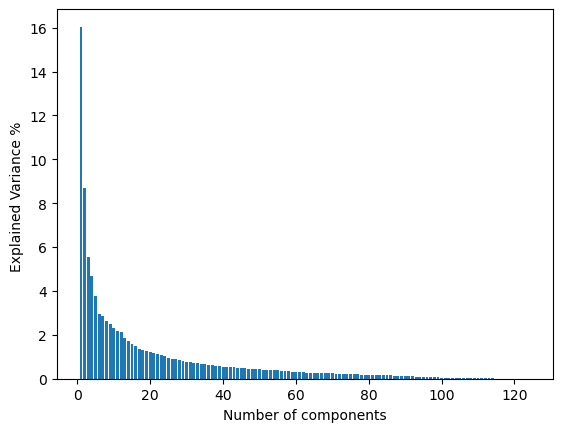

In [378]:
# let us plot components vs explained variance %
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_ *100)
plt.xlabel('Number of components')
plt.ylabel('Explained Variance % ')
plt.show()

In [ ]:
# since we have large number of features the above plot is hard to interpret

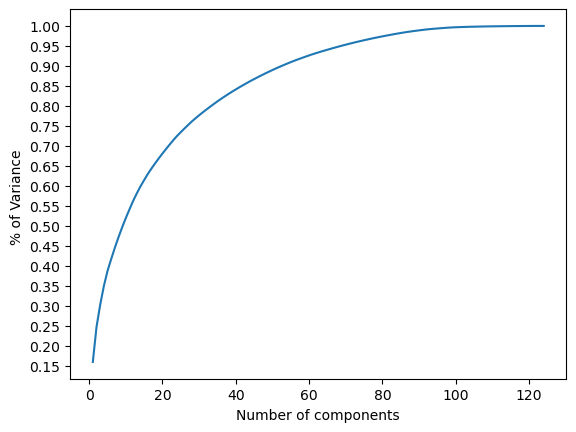

In [380]:
#let us plot Scree plots to understand how many components we need 
from matplotlib.ticker import MultipleLocator

var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1),var_cumu)
plt.xlabel("Number of components")
plt.ylabel("% of Variance ")
plt.gca().yaxis.set_major_locator(MultipleLocator(0.05))

In [433]:
# from the Scree plot above we can see around 95% of variance is explained by around 70 features
# we will use 0.95 as the variance to keep around 70 components


# Model Building Approach
- We will build models without PCA first 
- Then we will implement PCA 
- Finally we will compare accuracy and select best model for submission

### Logistic Regression
- we will use Logistic Regression as our first model 
- we will then use RFE followed by PCA and compare the metrics

#### Logistic Regression with only Hyperparameter tuning

In [381]:
# hyperparameter tuning for Logistic Regression 

#tuning paramter C for regularization 
params = { 'C': [0.01, 0.1, 1, 10, 100, 1000]}
folds= 5

from sklearn.model_selection import GridSearchCV

#instantiate
lr = LogisticRegression()

#using Grid Search
lr_1 = GridSearchCV(estimator=lr,param_grid=params,scoring='accuracy',cv=folds,return_train_score=True,verbose=1)

# fitting
lr_1.fit(X_train_scaled,y_train)



Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [382]:
#best estimator
lr_1_best = lr_1.best_estimator_

In [383]:
lr_1_best

LogisticRegression(C=1000)

In [384]:
#predict
y_pred_lr = lr_1_best.predict(X_test_scaled)

In [385]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score

In [386]:
# accuracy for Logirstic regression without rfe or pca
accuracy  = accuracy_score(y_test,y_pred_lr)

In [387]:
accuracy

0.9134285714285715

For our churn prediction, we dont want to miss out predicting customers who will actually churn.It's ok if we predict non churn as churn but we should minimize misclassifying churn as not churn. So, for this we will mainly compare recall score between all the models we obtain. But our primary objective is increasing accuracy

In [390]:
#recall for logistic_regression
recall_lr = recall_score(y_test,y_pred_lr) 
recall_lr

0.3491681699739427

In [391]:
# now lets use rfe
# let us use 20 columns 
from sklearn.feature_selection import RFE
rfe = RFE(estimator = lr_1_best, n_features_to_select=20) # we are reusing the lr_1_best as obtained after hyperparameter tuning
rfe = rfe.fit(X_train_scaled,y_train)

In [392]:
#columns which got selected
# storing the selected columns in col
col = X_train_scaled.columns[rfe.support_]
 
X_train_rfe1 = X_train_scaled[col]

In [393]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe1

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_og_mou_8,39.98
1,onnet_mou_8,28.36
5,std_og_t2t_mou_8,22.59
3,loc_og_t2m_mou_8,21.47
2,loc_og_t2t_mou_8,13.08
12,total_ic_mou_8,12.76
7,loc_ic_t2m_mou_8,6.94
9,loc_ic_mou_7,3.57
6,loc_ic_t2t_mou_8,3.37
11,std_ic_mou_8,2.45


In [394]:
# we can see loc_og_mou_8 has very very high VIF 
# lets drop and check again

X_train_rfe1 =X_train_rfe1.drop(columns='loc_og_mou_8')


In [395]:
# let us check VIF again
vif = pd.DataFrame()
X = X_train_rfe1

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,onnet_mou_8,27.03
4,std_og_t2t_mou_8,21.49
11,total_ic_mou_8,12.70
2,loc_og_t2t_mou_8,7.20
6,loc_ic_t2m_mou_8,6.92
8,loc_ic_mou_7,3.57
5,loc_ic_t2t_mou_8,3.34
10,std_ic_mou_8,2.45
3,loc_og_t2m_mou_8,2.16
14,total_rech_num_8,1.55


In [396]:
# let us try RFE again by selecting 15 features

rfe2 = RFE(estimator=lr_1_best, n_features_to_select=15)
rfe2.fit(X_train_rfe1,y_train)

RFE(estimator=LogisticRegression(C=1000), n_features_to_select=15)

In [397]:
#columns which got selected
# storing the selected columns in col
col = X_train_rfe1.columns[rfe2.support_]
 
X_train_rfe2 = X_train_rfe1[col]


In [398]:
#lets check VIF again
vif = pd.DataFrame()
X = X_train_rfe2

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,onnet_mou_8,27.00
4,std_og_t2t_mou_8,21.43
2,loc_og_t2t_mou_8,7.19
8,loc_ic_mou_7,3.49
6,loc_ic_t2m_mou_8,2.99
3,loc_og_t2m_mou_8,2.14
5,loc_ic_t2t_mou_8,1.87
12,total_rech_num_8,1.37
0,arpu_6,1.35
7,loc_ic_t2f_mou_8,1.28


In [399]:
# let us drop onnet_mou_8 and check
X_train_rfe2 = X_train_rfe2.drop(columns='onnet_mou_8')

In [400]:
#lets check VIF again
vif = pd.DataFrame()
X = X_train_rfe2

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,loc_ic_mou_7,3.48
5,loc_ic_t2m_mou_8,2.99
2,loc_og_t2m_mou_8,2.10
4,loc_ic_t2t_mou_8,1.86
1,loc_og_t2t_mou_8,1.52
11,total_rech_num_8,1.37
0,arpu_6,1.34
6,loc_ic_t2f_mou_8,1.28
3,std_og_t2t_mou_8,1.25
12,last_day_rch_amt_8,1.21


In [ ]:
# all VIF are less than 5 

In [82]:
#X_test_scaled_rfe = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [401]:
col = X_train_rfe2.columns
X_test_scaled_rfe =X_test_scaled_rfe[col]

In [408]:
# now vif values looks good, lets predict and find accuracy score

lr_final = LogisticRegression(C=1000)

lr_final = lr_final.fit(X_train_rfe2,y_train)

y_pred_lr_rfe = lr_final.predict(X_test_scaled_rfe)

accuracy_lr_rfe = accuracy_score(y_test, y_pred_lr_rfe)

In [409]:
accuracy_lr_rfe

0.908795918367347

In [411]:
recall_lr_rfe = recall_score(y_test, y_pred_lr_rfe)
recall_lr_rfe

0.19262377229905792

#### Logistic Regression with PCA

In [412]:
imp = SimpleImputer(strategy='constant', fill_value=0)
scale = StandardScaler()
pca = PCA(0.95) # we will use features explaining total of  95% variance 
pipe_lr = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca),
                         ('model',lr_1_best)])

In [413]:
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('model', LogisticRegression(C=1000))])

In [415]:
y_pred_lr_pca = pipe.predict(X_test)

In [414]:
pipe_lr.score(X_test,y_test)

0.9079795918367347

In [416]:
recall_lr_pca = recall_score(y_test,y_pred_lr_pca)
recall_lr_pca

0.5856885147324113

## Logistic Regression performance 
- only hyperparameter tuning : Accuracy:91.3%, Recall= 35%
- with RFE + hyperparamter : Accuracy=90.9%  , Recall= 19.26%
- with PCA + hyperparamter : Accuracy:90.8% ,  Recall:58.6%

## XGBoost 

In [417]:
# we will use Randomized search for hyperparameter tuning and cross validation
import xgboost as xgb
xgb = xgb.XGBClassifier()

In [418]:
# A parameter grid for XGBoost
params = {
    'n_estimators': randint(100, 1500),      # Number of trees
    'learning_rate': uniform(0.001, 0.3),     # Step size shrinkage (controls learning rate)
    'max_depth': randint(3, 15),             # Maximum depth of a tree
    'min_child_weight': randint(1, 30),      # Minimum sum of instance weight (hessian)
    'gamma': uniform(0, 0.5), # Minimum loss reduction to make a further partition
    'subsample': [0.5,0.6, 0.7,0.8,0.9, 1.0],
    'colsample_bytree': uniform(0.5, 1.0),   # Fraction of features used per tree
    'reg_alpha': uniform(0, 1),              # L1 regularization term
    'reg_lambda': uniform(1, 10)             # L2 regularization term
}

folds = 5  # we are choosing 5 fold cross validation






In [419]:
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=params,
    n_iter=50,  # Number of parameter settings to sample
    scoring='accuracy',  # Metric to evaluate on
    cv=folds,  
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all processors
)

In [420]:
X_train_scaled.shape

(20999, 124)

In [421]:
# fitting random search with 

random_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AD9627DA90>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001AD961DE0D0>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001AD961DEB90>,
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [422]:
xgb_best1 = random_search.best_estimator_ # for this non pCA xgboost
xgb_best2 = random_search.best_estimator_  # for pca xgboost

In [423]:
#predict
y_pred_xgb = xgb_best1.predict(X_test_scaled)

In [424]:
#finding accuracy
accuracy_XGB = accuracy_score(y_test,y_pred_xgb)

In [425]:
accuracy_XGB

0.9416734693877551

In [426]:
#finding recall
recall_xgb = recall_score(y_test,y_pred_xgb)
recall_xgb

0.6337943475646423

#### XGBoost with PCA 

In [427]:
# now lets use pipeline to implement pca along with all other things

In [433]:
imp = SimpleImputer(strategy='constant', fill_value=0)
scale = StandardScaler()
pca = PCA(0.95)



pipe_xgb_pca = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca),
                         ('model',xgb_best2)])


In [434]:
pipe_xgb_pca.fit(X_train,y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.9389714207056361, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.008605223024637253, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=7,
                               max_leaves=None, min_child_weight=23,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=1250,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [435]:
#predict
y_pred_xgb_pca = pipe_xgb_pca.predict(X_test)

In [437]:
# check accuracy
pipe_xgb_pca.score(X_test,y_test)

0.9215510204081633

In [438]:
#check recall
recall_xgb_pca = recall_score(y_test,y_pred_xgb_pca)
recall_xgb_pca

0.43455602325115256

## XGBoost   Performance 


- only hyperparameter tuning: Accuracy=94.2%, Recall = 63.4%
- with PCA + hyperparamter : Accuracy=92.2%, Recall = 43.5%

## Random Forest

In [441]:
# Define the model
rf = RandomForestClassifier()

# Define parameter grid
rf_param_distributions = {
    'n_estimators': randint(50, 201),  # Randomly choose between 50 and 200
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),  # Randomly choose between 2 and 10
    'min_samples_leaf': randint(1, 5)  # Randomly choose between 1 and 4
}

# Setup RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_distributions,
    n_iter=50,  # Number of parameter settings to try
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)





In [442]:
# Fit RandomizedSearchCV
rf_random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AD9654B650>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AD9654ADD0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AD95F03210>},
                   random_state=42, verbose=2)

In [443]:
# FInding best estimator
rf_best1 = rf_random_search.best_estimator_
rf_best2 = rf_random_search.best_estimator_


In [444]:
#predict
y_pred_rf = rf_best1.predict(X_test_scaled)

In [445]:
#check accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.941204081632653

In [446]:
#check recall
recall_rf = recall_score(y_test,y_pred_rf)
recall_rf

0.5953096812988575

#### Random Forest with PCA

In [447]:
# using pca pipleline

# lets use a pipeline to make 'clean and prepare' process faster


imp = SimpleImputer(strategy='constant', fill_value=0)
scale = StandardScaler()
pca = PCA(0.95)




pipe_rf_pca = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         
                         ('model',rf_best2)])





In [448]:
pipe_rf_pca.fit(X_train,y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                        min_samples_split=3,
                                        n_estimators=63))])

In [449]:
y_pred_pca = pipe_rf_pca.predict(X_test)

In [462]:
# check accuracy
pipe_rf_pca.score(X_test,y_test)


0.9412448979591836

In [463]:
#check recall 

recall_rf_pca = recall_score(y_test,y_pred_pca)
recall_rf_pca

0.5941070354780517

### Random Forest performance

- only hyperparameter tuning: Accuracy=94.1%, Recall = 59.5%
- with PCA + hyperparamter : Accuracy=94.1%, Recall = 59.4%

-----------------------------------------------------

# Test on unseen Data and Submission

From all the above models the best accuracy is achieved by :
- XGBoost with only hyperparameter tuning
- Recall is also high for this model
We will use this model for predicting our competition test data(unseen)

In [454]:
# lets test on our unseen data just for fun

unseen  = pd.read_csv('test.csv')

In [455]:
unseen.head(3)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.0,0.0,0.0,0.03,43.01,44.71,29.43,6.9,0.0,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.0,0.0,40.81,42.16,31.51,0.0,0.0,0.0,0.36,1.04,4.34,0.0,0.0,0.0,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.0,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.0,0.0,0.0,0.00,549.86,639.29,397.11,0.0,0.0,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.0,0.0,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.0,0.0,181.69,149.24,187.43,0.0,0.0,0.0,0.00,12.51,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.0,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [456]:
# making sure final columns are same as those of X_trained
final_columns = X_train.columns


In [457]:
# setting index and final columns
submission_data = unseen.set_index('id')[final_columns]
submission_data.shape

(30000, 124)

In [458]:
# let's use a pipeline to make 'clean and prepare' process faster


imp = SimpleImputer(strategy='constant', fill_value=0)
scale = StandardScaler()
pca = PCA(0.95)
pipe = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('model',xgb_best2)])




In [459]:
# fitting the pipeline
pipe.fit(X_train,y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.9389714207056361, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.008605223024637253, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=7,
                               max_leaves=None, min_child_weight=23,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=1250,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [461]:
# checking accuracy on 'our' test set once again to verify ( NOTE: this is not competition test set)
pipe.score(X_test,y_test)
# it is same as we got earlier, so pipeline is working fine

0.9416734693877551

In [464]:
#checking submission data
submission_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69999,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1692,0.00,0.00,0.00
70000,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00
70001,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,6,9,5,500,1000,1000,300,500,500,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,277,525.61,758.41,241.84
70002,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.0,6.18,0.00,8.26,98.61,22.86,0.00,2.16,0.00,37.09,94.36,0.00,0.0,0.0,0.0,37.09,96.53,0.00,0.0,0.0,0.0,0.00,12.03,1.15,0.0,0.0,0.0,45.36,207.18,24.01,58.11,54.64,23.04,487.94,449.83

In [465]:
submission_data.shape

(30000, 124)

In [466]:
# let us finally use the pipeline to predict on the unseen submission data
unseen['churn_probability'] = pipe.predict(submission_data)
# as mentioned in sample csv file we will need only id and churn column so taking only those in output df
output = unseen[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [467]:
#writing the output to submission_final csv file which we will upload in Kaggle
output.to_csv('submission_final.csv',index=False)

**With this we are done with our objective of building a model and predicting whether a customer will churn or not**

# Recommending strategies to manage customer churn

Earlier from our feature engineering using random forest to find feature importances we got the following insights:
- All important features obtained are from Month 8 (August). Assuming, churn happened in September, we can say that **factors influencing churn have higher significance on the month just before churn compared to other months**.
- Out of all 8 features, total incoming call minutes of usage(loc_ic_t2t_mou_8) has highest negative correlation. This may indicate that **if incoming calls are significantly lower for a customer then,  they dont have any oblogations to keep continuing on the same network(same number) and can switch easily to other operator**.
- If Average revenue per user (arpu_8) is low for a user it inidicates they are **either not placing enough outgoing calls or not recharging/ using data much which in turn may indicate they are planning to switch to other operator.**
- If Total Outgoing usage(total_of_mou_8) is less, then churn probabilty is high. This happens because **customers who are likely to churn will try to avoid placing calls in the last month so as to avoid extra charges before churning or they dont use the operator line much and therefore churn**.
- **customers spending less on recharge amount can be an indicator of them churning**. This is because they may have received discounts or offers from other operators so they are planning to churn and not spend more on this operator for the last month
- **Increase in roaming outgoing calls suggest that customer may have relocated to a new location and they have received other attractive offers there so they may churn. Increase in roaming also comes with some roaming charges and customers may be unhappy with this and this may cause them to churn.**


In [471]:
# the important / significant columns are :
important_features

,col,importance
2,arpu_8,0.035991
8,offnet_mou_8,0.016895
14,roam_og_mou_8,0.015148
20,loc_og_t2m_mou_8,0.026295
29,loc_og_mou_8,0.029646
53,total_og_mou_8,0.036431
56,loc_ic_t2t_mou_8,0.025251
59,loc_ic_t2m_mou_8,0.067018
65,loc_ic_mou_8,0.071703
80,total_ic_mou_8,0.092187


Now looking at the above points we can recommend the following:
1. Develop personalized offers or loyalty programs for customers showing a significant drop in incoming call minutes (loc_ic_t2t_mou_8). Since they may find it easier to switch operators, provide incentives like free incoming call minutes or special retention packages to keep them engaged.
2. For users with low Average Revenue Per User (arpu_8), implement targeted marketing campaigns offering discounts on data, attractive calling packages, or promotions aimed at boosting their engagement. We can also introduce plans that encourage higher usage, incentivizing them to stay on the network.
3. Customers with lower total outgoing usage (total_of_mou_8) may be planning to switch. Reach out to these users with personalized offers or reminders about their current plan's value. We could also incentivize usage with temporary bonus credits or rewards for frequent calling. 
4. Customers who spend less on recharges might be enticed by offers from competitors. Offer exclusive recharge discounts, better data/calling rates, or cashback on recharges to encourage them to stay.

5. For customers who have increased roaming usage, we can suggest migration-friendly plans with discounted roaming rates. We could also offer better rates for relocating customers or notify them of attractive home-circle offers in their new location.
6. We can focus on improving customer support for users who face issues like roaming charges or have relocated. Offer seamless network portability solutions, so they can continue to use the same number in a new location, reducing the likelihood of churn.
